<a href="https://colab.research.google.com/github/ponwinsiya2348539/DL/blob/main/DL_lab1_39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import numpy for array operations
import numpy as np

# Define the boolean functions as truth tables
AND = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
OR = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
NAND = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
XOR = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])

# Define the activation function (step function)
def step(x):
    return 1 if x >= 0 else 0

# Define the prediction function (forward pass)
def predict(x, w, b):
    return step(np.dot(x, w) + b)

# Define the training function (backward pass)
def train(data, epochs, lr):
    # Initialize the weights and bias randomly
    w = np.random.randn(2)
    b = np.random.randn(1)
    # Loop for the number of epochs
    for i in range(epochs):
        # Initialize the number of errors as zero
        errors = 0
        # Loop for each row in the data
        for x1, x2, y in data:
            # Get the input and output as arrays
            x = np.array([x1, x2])
            y = np.array([y])
            # Get the prediction
            y_pred = predict(x, w, b)
            # Calculate the error
            error = y - y_pred
            # Update the errors count
            errors += abs(error)
            # Update the weights and bias
            w = w + lr * error * x
            b = b + lr * error
        # Print the number of errors in each epoch
        print(f"Epoch {i+1}: {errors} errors")
    # Return the learned weights and bias
    return w, b

# Train the perceptron for each boolean function
print("Training for AND function")
w_and, b_and = train(AND, 10, 0.1)
print("Training for OR function")
w_or, b_or = train(OR, 10, 0.1)
print("Training for NAND function")
w_nand, b_nand = train(NAND, 10, 0.1)
print("Training for XOR function")
w_xor, b_xor = train(XOR, 10, 0.1)

# Test the perceptron for each boolean function
print("Testing for AND function")
for x1, x2, y in AND:
    x = np.array([x1, x2])
    y_pred = predict(x, w_and, b_and)
    print(f"{x1} AND {x2} = {y_pred}")

print("Testing for OR function")
for x1, x2, y in OR:
    x = np.array([x1, x2])
    y_pred = predict(x, w_or, b_or)
    print(f"{x1} OR {x2} = {y_pred}")

print("Testing for NAND function")
for x1, x2, y in NAND:
    x = np.array([x1, x2])
    y_pred = predict(x, w_nand, b_nand)
    print(f"{x1} NAND {x2} = {y_pred}")

print("Testing for XOR function")
for x1, x2, y in XOR:
    x = np.array([x1, x2])
    y_pred = predict(x, w_xor, b_xor)
    print(f"{x1} XOR {x2} = {y_pred}")


Training for AND function
Epoch 1: [3] errors
Epoch 2: [2] errors
Epoch 3: [1] errors
Epoch 4: [1] errors
Epoch 5: [1] errors
Epoch 6: [0] errors
Epoch 7: [0] errors
Epoch 8: [0] errors
Epoch 9: [0] errors
Epoch 10: [0] errors
Training for OR function
Epoch 1: [3] errors
Epoch 2: [2] errors
Epoch 3: [1] errors
Epoch 4: [2] errors
Epoch 5: [1] errors
Epoch 6: [2] errors
Epoch 7: [1] errors
Epoch 8: [0] errors
Epoch 9: [0] errors
Epoch 10: [0] errors
Training for NAND function
Epoch 1: [1] errors
Epoch 2: [2] errors
Epoch 3: [2] errors
Epoch 4: [1] errors
Epoch 5: [2] errors
Epoch 6: [2] errors
Epoch 7: [1] errors
Epoch 8: [2] errors
Epoch 9: [2] errors
Epoch 10: [1] errors
Training for XOR function
Epoch 1: [3] errors
Epoch 2: [3] errors
Epoch 3: [3] errors
Epoch 4: [2] errors
Epoch 5: [3] errors
Epoch 6: [2] errors
Epoch 7: [2] errors
Epoch 8: [3] errors
Epoch 9: [2] errors
Epoch 10: [2] errors
Testing for AND function
0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1
Testing for OR func

The minimum of f(x) is 1.0000000000001774 at x = 1.0000004212491667
The number of iterations is 72


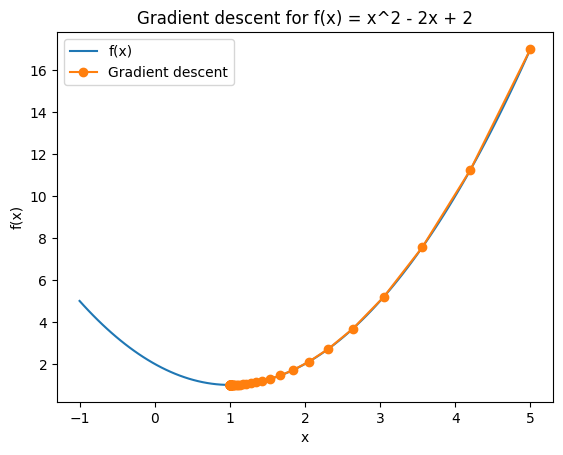

In [ ]:
# Import numpy for array operations
import numpy as np
# Import matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Define the function f(x) = x^2 - 2x + 2
def f(x):
    return x**2 - 2*x + 2

# Define the gradient of the function f'(x) = 2x - 2
def grad_f(x):
    return 2*x - 2

# Define the gradient descent function
def gradient_descent(func, grad, start, lr, eps, max_iter):
    # Initialize the current point, the function value, and the gradient norm
    x = start
    fx = func(x)
    norm = np.abs(grad(x))
    # Initialize the lists to store the points, the function values, and the gradient norms
    x_list = [x]
    fx_list = [fx]
    norm_list = [norm]
    # Initialize the iteration counter
    iter = 0
    # Loop until the gradient norm is less than the threshold or the maximum iterations are reached
    while norm > eps and iter < max_iter:
        # Update the current point by moving in the opposite direction of the gradient
        x = x - lr * grad(x)
        # Update the function value and the gradient norm
        fx = func(x)
        norm = np.abs(grad(x))
        # Update the lists
        x_list.append(x)
        fx_list.append(fx)
        norm_list.append(norm)
        # Update the iteration counter
        iter += 1
    # Return the lists and the number of iterations
    return x_list, fx_list, norm_list, iter

# Apply the gradient descent for the function
# Set the learning rate, the threshold, and the maximum iterations
lr = 0.1
eps = 1e-6
max_iter = 1000
# Set the starting point
start = 5
# Call the gradient descent function
x_list, fx_list, norm_list, iter = gradient_descent(f, grad_f, start, lr, eps, max_iter)
# Print the results
print(f"The minimum of f(x) is {fx_list[-1]} at x = {x_list[-1]}")
print(f"The number of iterations is {iter}")

# Plot the graph of f(x) and the points visited by the gradient descent
# Create an array of x values
x = np.linspace(-1, 5, 100)
# Create an array of f(x) values
y = f(x)
# Plot the function and the points
plt.plot(x, y, label="f(x)")
plt.plot(x_list, fx_list, 'o-', label="Gradient descent")
# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient descent for f(x) = x^2 - 2x + 2")
plt.legend()
# Show the plot
plt.show()


The minimum of f(x, y) is 3.139992492505519e-05 at (x, y) = [0.99440095 0.98881076]
The number of iterations is 10000


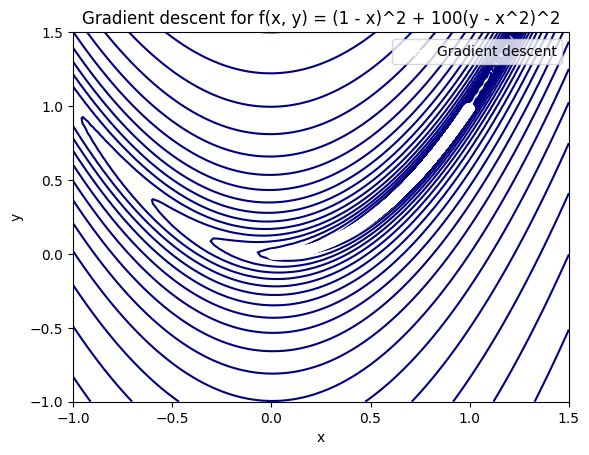

In [ ]:
# Import numpy for array operations
import numpy as np
# Import matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Define the function f(x, y) = (1 - x)^2 + 100(y - x^2)^2
def f(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

# Define the gradient of the function as a vector [f'_x, f'_y]
def grad_f(x, y):
    return np.array([-2*(1 - x) - 400*x*(y - x**2), 200*(y - x**2)])

# Define the gradient descent function
def gradient_descent(func, grad, start, lr, eps, max_iter):
    # Initialize the current point, the function value, and the gradient norm
    x = start
    fx = func(*x)
    norm = np.linalg.norm(grad(*x))
    # Initialize the lists to store the points, the function values, and the gradient norms
    x_list = [x]
    fx_list = [fx]
    norm_list = [norm]
    # Initialize the iteration counter
    iter = 0
    # Loop until the gradient norm is less than the threshold or the maximum iterations are reached
    while norm > eps and iter < max_iter:
        # Update the current point by moving in the opposite direction of the gradient
        x = x - lr * grad(*x)
        # Update the function value and the gradient norm
        fx = func(*x)
        norm = np.linalg.norm(grad(*x))
        # Update the lists
        x_list.append(x)
        fx_list.append(fx)
        norm_list.append(norm)
        # Update the iteration counter
        iter += 1
    # Return the lists and the number of iterations
    return x_list, fx_list, norm_list, iter

# Apply the gradient descent for the function
# Set the learning rate, the threshold, and the maximum iterations
lr = 0.001
eps = 1e-6
max_iter = 10000
# Set the starting point
start = np.array([0, 0])
# Call the gradient descent function
x_list, fx_list, norm_list, iter = gradient_descent(f, grad_f, start, lr, eps, max_iter)
# Print the results
print(f"The minimum of f(x, y) is {fx_list[-1]} at (x, y) = {x_list[-1]}")
print(f"The number of iterations is {iter}")

# Plot the graph of f(x, y) and the points visited by the gradient descent
# Create a grid of x and y values
x = np.linspace(-1, 1.5, 100)
y = np.linspace(-1, 1.5, 100)
x, y = np.meshgrid(x, y)
# Create an array of f(x, y) values
z = f(x, y)
# Plot the function and the points as a contour plot
plt.contour(x, y, z, levels=np.logspace(-1, 5, 35), cmap='jet')
plt.plot(*zip(*x_list), '-o', color='white', label="Gradient descent")
# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient descent for f(x, y) = (1 - x)^2 + 100(y - x^2)^2")
plt.legend()
# Show the plot
plt.show()
